# Understanding Correntropy as a Loss Function

![Payam](./pic/payam.jpg)
- Author  : Payam Parvazmanesh
- Contact : payam.manesh@gmail.com
- Pattern Recognition

## 1. Introduction
In machine learning and Pattern Recognition, loss functions are crucial for guiding the training process of models by quantifying the difference between predicted and actual values. Traditional loss functions like Mean Squared Error (MSE) are widely used; however, they can be sensitive to outlier(In statistics, an outlier is a data point that differs significantly from other observations).  Correntropy is a robust alternative that addresses this issue by focusing on the similarity of distributions rather than individual errors. This notebook explores correntropy in depth, covering its mathematical foundation, properties, applications, and implementation.

## 2. What is the correntropy?
Correntropy is a statistical measure that quantifies the similarity between two random variables or signals, by considering their statistical properties and temporal structure. It is particularly useful for analyzing non-linear relationships and robustness to noise in data.

The 
name correntropy comes from correlation and entropy:

- Correlation shows the relationship between two or more variables. when one variable changes, how does the other respond? A strong correlation means that the variables move together in a predictable way.

![correlation](./pic/correlation.png)
- Entropy shows the amount of disorder and uncertainty in a system or distribution. Imagine you have a deck of cards; if it’s perfectly ordered, the entropy is low. If the cards are shuffled randomly, the entropy is high. So, in statistical terms, higher entropy means more unpredictability, while lower entropy suggests a more orderly situation.

![entropy](./pic/entropy.jpg)

## 3. Mathematical Formulation


### 3.1 Correntropy Function

The correntropy function is defined mathematically as:

$$
V_\sigma(X, Y) = \mathbb{E} [ k_\sigma(X, Y) ]
$$
Where kσ(.) refers to the kernel function.and $E[.]$ showes the mathematical expectation.

One of the advantages of using the kernel is that we can transfer the data that cannot be separated linearly to a space with more dimensions so that we can separate them linearly.

Suppose we intend to use the Gaussian kernel:
$$ k_{\sigma}(u) = \exp\left(-\frac{u^2}{2\sigma^2}\right) $$ 

If Gaussian kernel is used, the correntropy formula is as follows:
 
$$
V(y_i, f(x_i)) = 1 - \exp\left(-\frac{(y_i - f(x_i))^2}{2\sigma^2}\right)
$$

And if we want to calculate the expectation value for the loss function, we have:

$$
\mathbb{E} \left[ k_\sigma(y_i, f(x_i)) \right] \approx \frac{1}{N} \sum_{i=1}^{N} V(y_i - f(x_i))
$$



**Breaking down the components:**
- **$V(y_i, f(x_i))$**: Represents the correntropy between the actual value $y_i$ and the predicted value $(f(x_i))$.
- **$y_i$**: The true target value for the $(i)-th$ sample in the dataset.
- **$f(x_i)$**: The predicted value from the model for the $(i)-th$ input $(x_i)$.
- **σ**: A bandwidth parameter that controls the width of the Gaussian kernel.
- **exp**: The exponential function transforms the squared difference into a similarity measure.

### 3.2 Interpretation of Correntropy

The output of the correntropy function ranges from 0 to 1:
- **0**: Indicates perfect similarity.
- **1**: Indicates no similarity at all.

This design makes correntropy particularly robust to outliers by smoothing the influence of significant deviations.



## 4. Properties of Correntropy
Some important properties of correntropy are presented here.
### 4.1 Correntropy is symmetric: 
$$Vσ(A,B)=Vσ (B,A)$$

- **Proof Steps**:

1. **Start with the Definition**:  
   The correntropy can be expressed using the kernel function k(.):

   $$
   V_\sigma(A, B) = \mathbb{E}[\kappa(A - B)]
   $$

2. **Change of Variables**:  
   

   $$
   V_\sigma(B, A) = \mathbb{E}[\kappa(B - A)]
   $$

3. **Relationship Between \( A - B \) and \( B - A \)**:  
   Notice that:

   $$
   B - A = - (A - B)
   $$

4. **Using the Kernel Function**:  

   $$
   V_\sigma(B, A) = \mathbb{E}[\kappa(B - A)] = \mathbb{E}[\kappa(- (A - B))]
   $$

5. **Properties of Kernel Function**:  
   If the kernel function is an even function (which is typical for many common kernels, such as Gaussian or polynomial kernels), then:

   $$
   \kappa(-x) = \kappa(x)
   $$

   Therefore,

   $$
   V_\sigma(B, A) = \mathbb{E}[\kappa(- (A - B))] = \mathbb{E}[\kappa(A - B)]
   $$


### 4.2 Correntropy is positive and bounded:
- **Proof Steps**:
#### Positivity

1. **When \( error = 0 \)**:
   $$
   V(0) = 1 - \exp(0) = 1 - 1 = 0
   $$
   So \( V(0) = 0 \).

2. **When $( error \neq 0 )$**:
   The term $( -0.5 \left(\frac{error}{\sigma}\right)^2 )$ is negative, making $( \exp\left(-0.5 \left(\frac{error}{\sigma}\right)^2\right) )$ a positive value less than 1. Therefore:
   $$
   1 - \exp\left(-0.5 \left(\frac{error}{\sigma}\right)^2\right) > 0 \quad \text{(for \( error \neq 0 \))}
   $$
   Thus, $( V(error) > 0 )$ for all $( error \neq 0 )$.

#### Boundedness

1. **As $( |error| \to \infty )$**:
   $$
   -0.5 \left(\frac{error}{\sigma}\right)^2 \to -\infty \quad \Rightarrow \quad \exp\left(-0.5 \left(\frac{error}{\sigma}\right)^2\right) \to 0
   $$
   Therefore, \( V(error) \) approaches:
   $$
   V(error) \to 1 - 0 = 1
   $$

2. **Upper Bound**:
   Since $( \exp(-x))$ is always less than or equal to 1 for any real $( x )$, it follows that:
   $$
   1 - \exp\left(-0.5 \left(\frac{error}{\sigma}\right)^2\right) < 1
   $$

### 4.3 Correntropy involves all the even moments 
- **Proof Steps**:
1. **Exponential Function and Taylor Series:**
 
     The exponential function can be expanded using a Taylor series:
$$
\exp(x) = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots
$$

     For our case, we want to look at:

$$
\exp\left(-\frac{(y-f(x_i))^2}{2\sigma^2}\right)
$$


3. **Expansion of the Exponential:**
$$
\exp\left(-\frac{(y-f(x_i))^2}{2\sigma^2}\right) = 1 - \frac{(y-f(x_i))^2}{2\sigma^2} + \frac{(y-f(x_i))^4}{4! (2\sigma^2)^2} - \frac{(y-f(x_i))^6}{6! (2\sigma^2)^3} + \cdots
$$   


4. **Plugging into Correntropy Formula:**

     Substituting this back into the correntropy definition gives us:
$$
V(y-f(x_i)) = 1 - \left(1 - \frac{(y-f(x_i))^2}{2\sigma^2} + \frac{(y-f(x_i))^4}{4! (2\sigma^2)^2} - \cdots \right)
$$

5. **Simplifying the Expression:**

     When we simplify, we find:
$$
V(y-f(x_i)) = \frac{(y-f(x_i))^2}{2\sigma^2} - \frac{(y-f(x_i))^4}{4! (2\sigma^2)^2} + \cdots
$$   

6. **Conclusion: Correntropy and Even Moments**

     - The correntropy function $(V(Z))$ incorporates contributions from all even moments of $( Z )$.
     - Each term in the series represents a different even moment (like variance, kurtosis, etc.) of the distribution of $( Z )$.
     


## 5. An example to find the parameter values ​​of a regression model using correntropy cost function and derivation
### Model Setup
For our regression model, we define the prediction as:
$$
\hat{y} = w_0 + w_1 x$$
where $( w_0 )$ is the intercept and $( w_1 )$ is the slope.

### Correntropy Loss Function
The Correntropy loss function can be expressed as:
$$
L(w_0, w_1) = \frac{1}{N} \sum_{i=1}^{N} \left(1 - e^{-\frac{(y_i - (w_0 + w_1 x_i))^2}{2\sigma^2}}\right)$$
where $( y_i )$ is the true value, $(\hat{y_i})$ is the predicted value, and $( \sigma\ )$ is the bandwidth parameter.
### Derivative with Respect to $( w_0 )$
To compute the derivative with respect to $( w_0 )$:
$$
\frac{\partial L}{\partial w_0} = \frac{1}{N} \sum_{i=1}^{N} e^{-\frac{(y_i - (w_0 + w_1 x_i))^2}{2\sigma^2}} \cdot (y_i - (w_0 + w_1 x_i))$$
Setting this equal to zero:
$$
\frac{1}{N} \sum_{i=1}^{N} e^{-\frac{(y_i - (w_0 + w_1 x_i))^2}{2\sigma^2}} \cdot (y_i - (w_0 + w_1 x_i)) = 0$$

$$
w_0 = \frac{\sum_{i=1}^{N} e^{-\frac{(y_i - (w_0 + w_1 x_i))^2}{2\sigma^2}} \cdot y_i  -  w_1 \sum_{i=1}^{N} e^{-\frac{(y_i - (w_0 + w_1 x_i))^2}{2\sigma^2}} \cdot x_i}{\sum_{i=1}^{N} e^{-\frac{(y_i - (w_0 + w_1 x_i))^2}{2\sigma^2}}}.$$

### Derivative with Respect to $( w_1 )$
Similarly, the derivative with respect to $( w_1 )$ is:
$$
\frac{\partial L}{\partial w_1} = \frac{1}{N} \sum_{i=1}^{N} e^{-\frac{(y_i - (w_0 + w_1 x_i))^2}{2\sigma^2}} \cdot (y_i - (w_0 + w_1 x_i)) \cdot x_i$$
Setting this equal zero:
$$
\frac{1}{N} \sum_{i=1}^{N} e^{-\frac{(y_i - (w_0 + w_1 x_i))^2}{2\sigma^2}} \cdot (y_i - (w_0 + w_1 x_i)) \cdot x_i = 0\
$$

$$
w_1 = \frac{\sum_{i=1}^{N} e^{-\frac{(y_i - (w_0 + w_1 x_i))^2}{2\sigma^2}} \cdot y_i \cdot x_i - w_0 \sum_{i=1}^{N} e^{-\frac{(y_i - (w_0 + w_1 x_i))^2}{2\sigma^2}} \cdot x_i}{\sum_{i=1}^{N} e^{-\frac{(y_i - (w_0 + w_1 x_i))^2}{2\sigma^2}} \cdot x_i^2}.
$$

## 6. Effect of Changing σ
σ specifies how much of the data is considered in the correntropy calculation. A larger size of σ causes similar distributions to be more affected, resulting in a smoother estimate of the correntropy. Conversely, a smaller size of σ makes it more sensitive to small changes in the data.

To illustrate how the choice of σ affects the correntropy loss in relation to prediction error, plots can be generated for a range of errors, with each curve corresponding to a different σ. This visualization aids in understanding the sensitivity of correntropy to the bandwidth parameter.

![sigma](./pic/sigma.png)

### Code Example for Effect of Changing σ

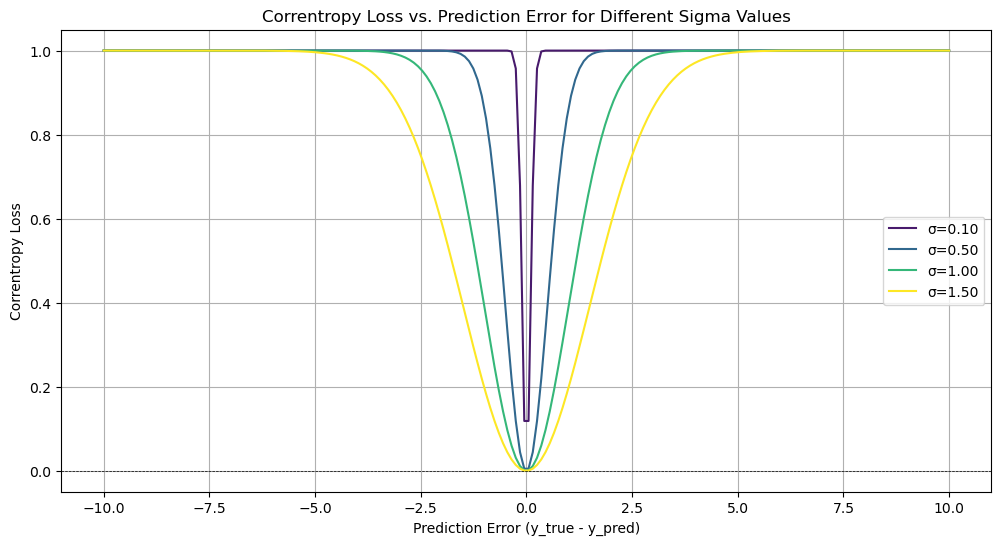

In [7]:
# Function to visualize the effect of different sigma values on correntropy loss based on prediction error
import numpy as np
import matplotlib.pyplot as plt

def correntropy_loss(y_true, y_pred, sigma):
    error = y_true - y_pred
    return np.mean(1-np.exp(-error**2 / (2 * sigma**2)))

def plot_correntropy_loss_vs_error(sigmas, error_range):
    plt.figure(figsize=(12, 6))
    
    for sigma in sigmas:
        losses = [correntropy_loss(np.array([0]), np.array([error]), sigma=sigma) for error in error_range]
        plt.plot(error_range, losses, color=plt.cm.viridis(sigma / max(sigmas)), label=f'σ={sigma:.2f}')

    plt.title('Correntropy Loss vs. Prediction Error for Different Sigma Values')
    plt.xlabel('Prediction Error (y_true - y_pred)')
    plt.ylabel('Correntropy Loss')
    plt.axhline(0, color='black', lw=0.5, ls='--')  # Add a horizontal line at y=0
    plt.grid()
    plt.legend()
    plt.show()

# Define the error range and sigmas
error_range = np.linspace(-10, 10, 200)  # Range of prediction errors
sigmas = [0.1, 0.5, 1.0, 1.5]  # Updated sigma values

# Plot the effect of sigma on loss vs error
plot_correntropy_loss_vs_error(sigmas, error_range)

## 7. Applications
Correntropy is applicable in several domains:
- **Signal Processing**: Used for noise reduction in signals.
- **Robust Statistics**: Provides enhanced parameter estimation in regression.
- **Machine Learning**: Improves performance in models dealing with noisy or extreme data.


## 8. Types of Machine Learning Algorithms Using Correntropy
Correntropy is employed in various machine learning models, including:
- **Regression Algorithms**
- **Support Vector Machines (SVMs)**
- **Neural Networks**
- **Clustering Algorithms**

## 9. Comparison with Other Cost Functions


### 9.1 Mean Squared Error (MSE)
- **Definition**: MSE measures the average squared difference between the actual and predicted values. It is defined as:
  $$
  \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
  $$
- **Sensitivity to Outliers**: 
  - MSE is very sensitive to outliers because the errors are squared. Large errors have a disproportionately large effect on the overall metric.
- **Use Cases**: 
  - Commonly used in regression problems and optimization scenarios where larger errors are more costly.
- **Interpretation**: 
  - The unit of MSE is the square of the unit of the target variable, which can complicate interpretations.

### 9.2 Mean Absolute Error (MAE)
- **Definition**: MAE measures the average absolute difference between the actual and predicted values. It is defined as:
  $$
  \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
  $$
- **Sensitivity to Outliers**: 
  - MAE is less sensitive to outliers than MSE since it takes the absolute value of errors. However, it still reflects significant errors.
- **Use Cases**: 
  - Preferred when all errors should be treated equally and when robustness to outliers is important.
- **Interpretation**: 
  - The unit of MAE is the same as the unit of the target variable, making it easier to interpret.

### 9.3 Correntropy
- **Definition**: Correntropy is a measure of similarity between two distributions, often used in contexts where robustness to noise and outliers is desired. It is defined as:
  $$
  \text{Correntropy} = \mathbb{E}[K_{\sigma}(y_i - \hat{y}_i)]
  $$
  
- **Sensitivity to Outliers**: 
  - Correntropy is generally more robust to outliers compared to both MSE and MAE, as it uses a kernel function that diminishes the influence of large errors.
- **Use Cases**: 
  - Useful in signal processing, machine learning, and contexts where the data may be noisy or contain outliers.
- **Interpretation**: 
  - Correntropy provides a measure of similarity, which can be less intuitive than MSE or MAE but offers valuable insights in certain applications.

### Comparison Summary
- **Robustness**: 
  - Correntropy > MAE > MSE in terms of robustness to outliers.
- **Sensitivity to Errors**: 
  - MSE is the most sensitive, followed by MAE, with Correntropy being the least sensitive due to its kernel-based approach.
- **Interpretability**: 
  - MAE is the easiest to interpret, followed by MSE, while Correntropy might require a deeper understanding of its kernel function.
- **Application Suitability**: 
  - Use MSE when large errors are particularly detrimental; MAE for equal treatment of errors; and Correntropy when data is expected to be noisy or have outliers.


## 10. Visualization
To visualize the performance of correntropy compared to MSE and MAE, one can create a plot illustrating the loss values for both functions across a range of predictions. This comparison can help elucidate the strengths of correntropy in the presence of outliers.

### Code Example for Visualization

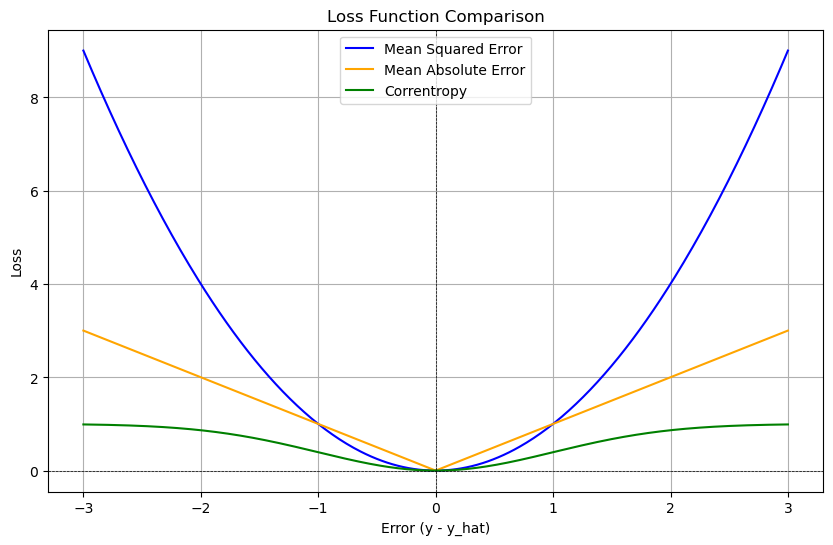

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Generate error values
errors = np.linspace(-3, 3, 400)

# Mean Squared Error
mse = errors ** 2

# Mean Absolute Error
mae = np.abs(errors)

# Correntropy (using a Gaussian kernel)
sigma = 1.0  # Bandwidth parameter
correntropy = 1-np.exp(-0.5 * (errors / sigma) ** 2)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(errors, mse, label='Mean Squared Error', color='blue')
plt.plot(errors, mae, label='Mean Absolute Error', color='orange')
plt.plot(errors, correntropy, label='Correntropy', color='green')
plt.title('Loss Function Comparison')
plt.xlabel('Error (y - y_hat)')
plt.ylabel('Loss')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.show()


## 11. Example of sensitivity to Outliers

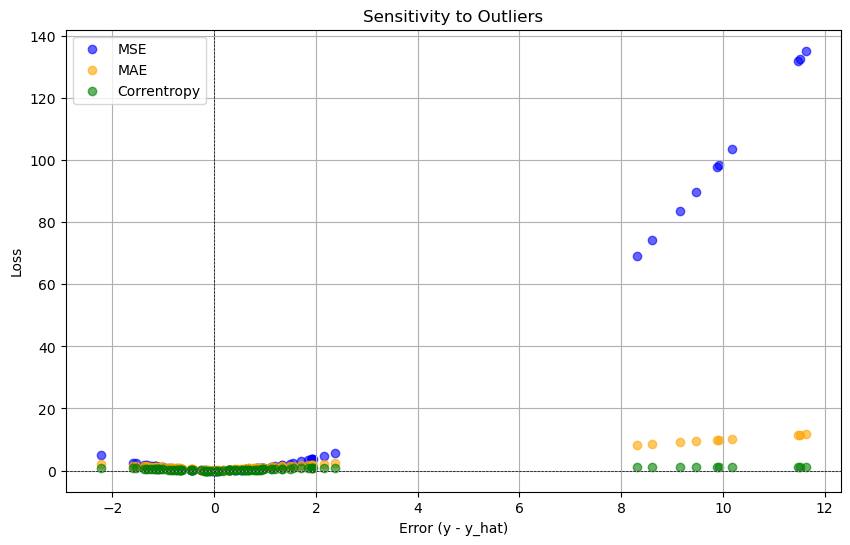

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a dataset with some outliers
np.random.seed(0)
true_values = np.random.normal(loc=0, scale=1, size=100)
predicted_values = true_values + np.random.normal(loc=0, scale=1, size=100)

# Introduce some outliers
predicted_values[::10] += np.random.normal(loc=10, scale=1, size=10)  # Adding outliers

# Calculate errors
errors = predicted_values - true_values

# Loss calculations
mse = errors ** 2
mae = np.abs(errors)
sigma = 1.0
correntropy = 1-np.exp(-0.5 * (errors / sigma) ** 2)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(errors, mse, color='blue', label='MSE', alpha=0.6)
plt.scatter(errors, mae, color='orange', label='MAE', alpha=0.6)
plt.scatter(errors, correntropy, color='green', label='Correntropy', alpha=0.6)
plt.title('Sensitivity to Outliers')
plt.xlabel('Error (y - y_hat)')
plt.ylabel('Loss')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.show()


## 12. Example of finding parameters in linear regression using correntropy cost function and gradient descent


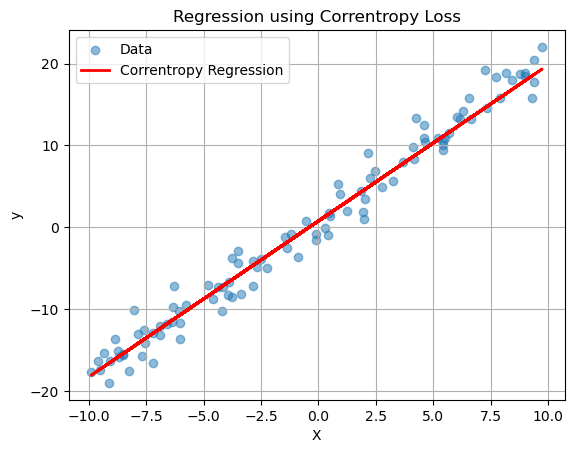

Learned weights: [0.76385163 1.90684434]


In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Correntropy Loss function
def correntropy_loss(y_true, y_pred, sigma):
    error = y_true - y_pred
    return np.mean(1-np.exp(-error**2 / (2 * sigma**2)))

# Generate sample data
np.random.seed(42)
X = np.random.uniform(-10, 10, 100)  # 100 random points
y = 2 * X + 1 + np.random.normal(0, 2, 100)  # Linear function with less noise

# Linear regression model
def linear_model(X, weights):
    return weights[0] + weights[1] * X

# Train model using Correntropy
def train_with_correntropy(X, y, sigma, learning_rate=0.01, epochs=1000):
    weights = np.random.randn(2)  # Random initial weights
    for epoch in range(epochs):
        y_pred = linear_model(X, weights)  # Predict using current weights
        loss = correntropy_loss(y, y_pred, sigma)  # Calculate loss

        # Compute gradients
        error = y - y_pred
        gradient_w0 = np.mean(error * np.exp(-error**2 / (2 * sigma**2))) * -1  # Gradient for w0
        gradient_w1 = np.mean(error * np.exp(-error**2 / (2 * sigma**2)) * X) * -1  # Gradient for w1
        
        # Update weights
        weights[0] -= learning_rate * gradient_w0
        weights[1] -= learning_rate * gradient_w1

        # (Optional) Display training progress
        #if epoch % 100 == 0:
            #print(f'Epoch {epoch}, Loss: {loss:.4f}, Weights: {weights}')

    return weights

# Parameters
sigma = 1.0
weights = train_with_correntropy(X, y, sigma)  # Train the model

# Plot results
plt.scatter(X, y, label='Data', alpha=0.5)  # Scatter plot of the data
plt.plot(X, linear_model(X, weights), color='red', label='Correntropy Regression', linewidth=2)  # Regression line
plt.title('Regression using Correntropy Loss')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

print(f"Learned weights: {weights}")  # Display learned weights


## 13. Conclusion
Correntropy offers a robust alternative to traditional loss functions, effectively handling outliers and capturing the underlying structure of data. Its mathematical foundation and properties make it suitable for various applications, from signal processing to robust statistics and machine learning. While correntropy shows considerable advantages, careful selection of the kernel and its parameters is essential for optimal performance.
### References

1. Correntropy induced loss based sparse robust graph regularized extreme learning machine for cancer classification. [Link to the paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7542897/).
2. From MSE to Correntropy, a friendly survey. [Link to the paper](https://sbic.org.br/lnlm/wp-content/uploads/2021/12/vol19-no1-art5.pdf).
3. Robust Recognition via Information Theoretic Learning.
